In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
from scipy import stats

In [99]:
def processar_arquivo(filepath):
    try:
        # Leitura dos dados
        pulsos = pd.read_csv(filepath, delimiter=' ', header=None, names=['Pulsos', 'Litros'])
        vec_pulsos = pulsos['Pulsos'].to_list()
        vec_litros = pulsos['Litros'].to_list()

        # Verificar se as listas não estão vazias
        if not vec_pulsos or not vec_litros:
            print(f"Dados vazios no arquivo {filepath}")
            return None, None, None

        # Cálculos estatísticos
        media_pulsos = np.mean(vec_pulsos)
        desvioP = np.std(vec_pulsos)
        erroR = desvioP / media_pulsos

        media_litros = abs(np.mean(vec_litros))

        # Resultados
        resultados = {
            'Media_pulsos': media_pulsos,
            'Erro_relativo_pulsos': erroR,
            'Media_litros': media_litros
        }
        return resultados, vec_pulsos, vec_litros
    except Exception as e:
        print(f"Erro ao processar o arquivo {filepath}: {e}")
        return None, None, None

In [111]:
data1 = np.array([1613,1721,1675,1690,1708,1655,1701,1675,1740,1731,1690,1661,1641,1686,1663,1781,1722,1695,1658,1674])

In [110]:
np.savetxt("./Pulsos/calibracao.txt",data1)

Estatística t: 3.2692466948521863
Valor p: 0.0022945383015065446
Rejeitamos a hipótese nula: as médias são significativamente diferentes.


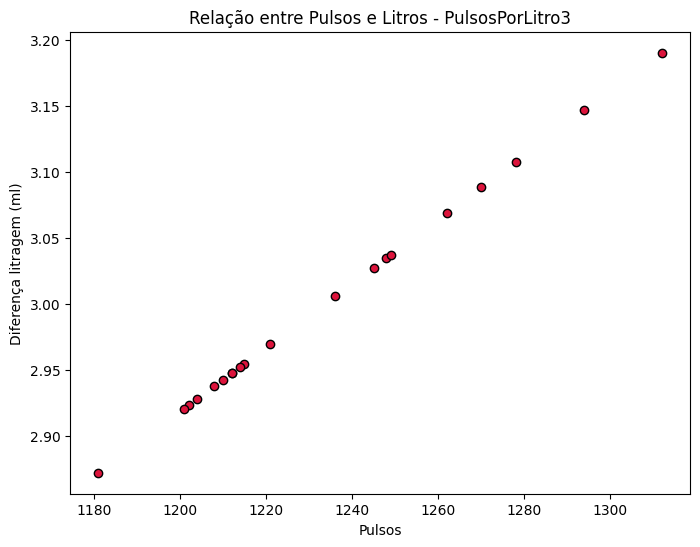

Estatística t: 1.5871094280787006
Valor p: 0.12077517436908464
Não rejeitamos a hipótese nula: não há evidência suficiente para afirmar que as médias são diferentes.


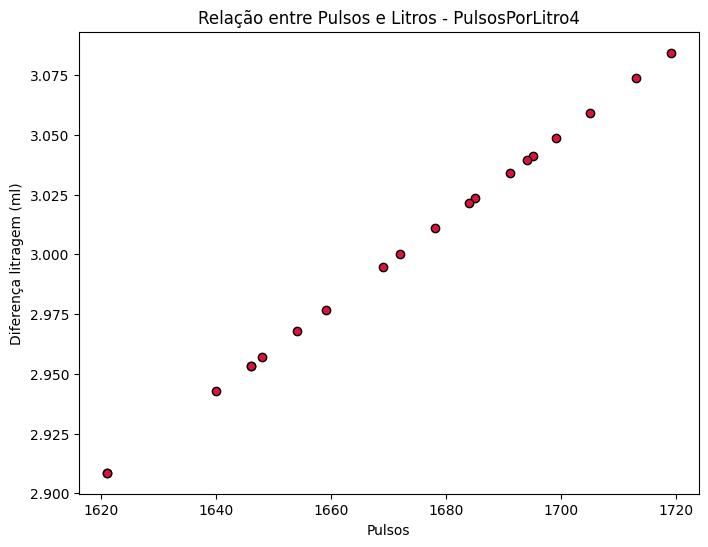

          filename  Media_pulsos  Erro_relativo_pulsos  Media_litros
0  PulsosPorLitro3       1233.70              0.027617       2921.10
1  PulsosPorLitro4       1671.95              0.016963       3907.75


In [125]:


diretorio = 'Pulsos'
todos_resultados = []
arquivos = os.listdir(diretorio)
arquivos = [i for i in arquivos if('calibracao' not in i)]
arquivos.sort() 
valores_a_subtrair = [3000, 4000]
for filename, valor_a_subtrair in zip(arquivos, valores_a_subtrair):
    filepath = os.path.join(diretorio, filename)
    resultados, vec_pulsos, vec_litros = processar_arquivo(filepath)
    t_stat, p_value = stats.ttest_ind(data1/4, np.array(vec_pulsos)/int(filepath[-1]))

    print(f"Estatística t: {t_stat}")
    print(f"Valor p: {p_value}")

    # Verificando se rejeitamos a hipótese nula (nível de significância de 0.05)
    if p_value < 0.05:
        print("Rejeitamos a hipótese nula: as médias são significativamente diferentes.")
    else:
        print("Não rejeitamos a hipótese nula: não há evidência suficiente para afirmar que as médias são diferentes.")

    if resultados is not None:
        # Adicionar os resultados à lista
        todos_resultados.append({'filename': filename, **resultados})
        vec_litros_ajustados = [litro - valor_a_subtrair for litro in vec_litros]

        # Plotando o gráfico de dispersão para cada arquivo
        plt.figure(figsize=(8, 6))
        plt.scatter(vec_pulsos, vec_pulsos/(np.mean(vec_pulsos)/3), color='crimson', ec = 'k')
        plt.title(f'Relação entre Pulsos e Litros - {filename}')
        plt.xlabel('Pulsos')
        plt.ylabel('Diferença litragem (ml)')
        plt.show()
    else:
        print(f"Não foram gerados resultados para o arquivo {filename}")
# Convertendo todos os resultados para um DataFrame
if todos_resultados:
    resultados_df = pd.DataFrame(todos_resultados)
    print(resultados_df)
    resultados_df.to_csv('resultados.csv', index=False)
else:
    print("Nenhum resultado processado.")

Estatística t: 3.2692466948521863
Valor p: 0.0022945383015065446
Rejeitamos a hipótese nula: as médias são significativamente diferentes.


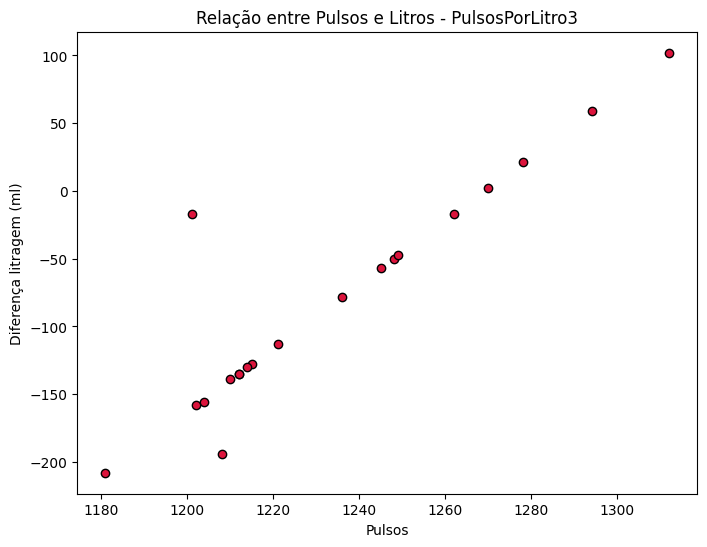

Estatística t: 1.5871094280787006
Valor p: 0.12077517436908464
Não rejeitamos a hipótese nula: não há evidência suficiente para afirmar que as médias são diferentes.


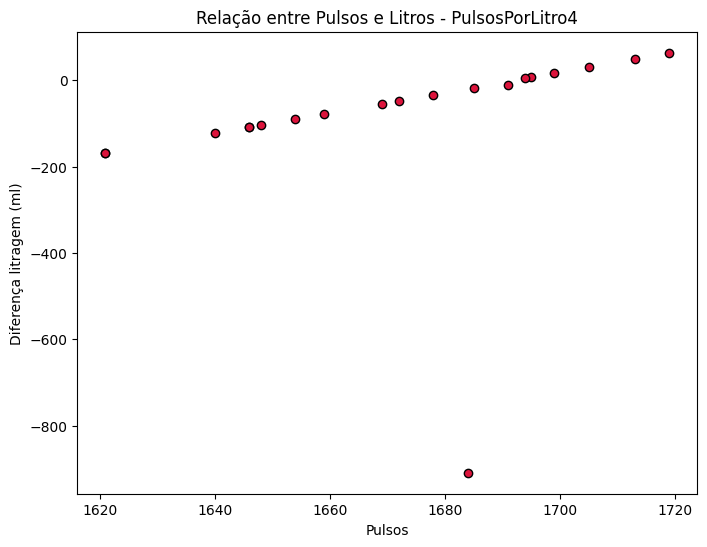

          filename  Media_pulsos  Erro_relativo_pulsos  Media_litros
0  PulsosPorLitro3       1233.70              0.027617       2921.10
1  PulsosPorLitro4       1671.95              0.016963       3907.75


In [127]:


diretorio = 'Pulsos'
todos_resultados = []
arquivos = os.listdir(diretorio)
arquivos = [i for i in arquivos if('calibracao' not in i)]
arquivos.sort() 
valores_a_subtrair = [3000, 4000]
for filename, valor_a_subtrair in zip(arquivos, valores_a_subtrair):
    filepath = os.path.join(diretorio, filename)
    resultados, vec_pulsos, vec_litros = processar_arquivo(filepath)
    t_stat, p_value = stats.ttest_ind(data1/4, np.array(vec_pulsos)/int(filepath[-1]))

    print(f"Estatística t: {t_stat}")
    print(f"Valor p: {p_value}")

    # Verificando se rejeitamos a hipótese nula (nível de significância de 0.05)
    if p_value < 0.05:
        print("Rejeitamos a hipótese nula: as médias são significativamente diferentes.")
    else:
        print("Não rejeitamos a hipótese nula: não há evidência suficiente para afirmar que as médias são diferentes.")

    if resultados is not None:
        # Adicionar os resultados à lista
        todos_resultados.append({'filename': filename, **resultados})
        vec_litros_ajustados = [litro - valor_a_subtrair for litro in vec_litros]

        # Plotando o gráfico de dispersão para cada arquivo
        plt.figure(figsize=(8, 6))
        plt.scatter(vec_pulsos, vec_litros_ajustados, color='crimson', ec = 'k')
        plt.title(f'Relação entre Pulsos e Litros - {filename}')
        plt.xlabel('Pulsos')
        plt.ylabel('Diferença litragem (ml)')
        plt.show()
    else:
        print(f"Não foram gerados resultados para o arquivo {filename}")
# Convertendo todos os resultados para um DataFrame
if todos_resultados:
    resultados_df = pd.DataFrame(todos_resultados)
    print(resultados_df)
    resultados_df.to_csv('resultados.csv', index=False)
else:
    print("Nenhum resultado processado.")